In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
df.info()
#we have collection of object,float,integer. float and integer datas can be understandable by machine and we need to convert object type to machine understandable language

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [5]:
#find no of rows and columns of the project
df.shape

(8425, 23)

In [6]:
# separate numerical and categorical data
#numerical data
numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 16 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']


In [7]:
#categorical data
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 7 categorical variables

The categorical variables are : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [8]:
''''There is a date variable. It is denoted by Date column.
There are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.
There are two binary categorical variables - RainToday and RainTomorrow.
RainTomorrow is the target variable.'''

"'There is a date variable. It is denoted by Date column.\nThere are 6 categorical variables. These are given by Location, WindGustDir, WindDir9am, WindDir3pm, RainToday and RainTomorrow.\nThere are two binary categorical variables - RainToday and RainTomorrow.\nRainTomorrow is the target variable."

In [9]:
# check missing values in categorical variables

df[categorical].isnull().sum()

Date              0
Location          0
WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64

In [10]:
# print categorical variables containing missing values

cat1 = [var for var in categorical if df[var].isnull().sum()!=0]
print(df[cat1].isnull().sum())

WindGustDir     991
WindDir9am      829
WindDir3pm      308
RainToday       240
RainTomorrow    239
dtype: int64


In [11]:
#We can see that there are only 4 
#categorical variables in the dataset which contains missing values. 
#These are `WindGustDir`, `WindDir9am`, `WindDir3pm` and `RainToday`.

In [12]:
# view frequency of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()) 

2011-01-31    5
2011-05-08    5
2011-05-21    5
2011-05-20    5
2011-05-19    5
             ..
2013-01-28    1
2013-01-29    1
2013-01-30    1
2013-01-31    1
2013-06-08    1
Name: Date, Length: 3004, dtype: int64
Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64
N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64
N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64
SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
N

In [13]:
# view frequency distribution of categorical variables

for var in categorical: 
    
    print(df[var].value_counts()/np.float(len(df)))

2011-01-31    0.000593
2011-05-08    0.000593
2011-05-21    0.000593
2011-05-20    0.000593
2011-05-19    0.000593
                ...   
2013-01-28    0.000119
2013-01-29    0.000119
2013-01-30    0.000119
2013-01-31    0.000119
2013-06-08    0.000119
Name: Date, Length: 3004, dtype: float64
Melbourne       0.192522
Williamtown     0.145994
PerthAirport    0.142908
Albury          0.107656
Newcastle       0.097567
CoffsHarbour    0.072522
Brisbane        0.068724
Penrith         0.057211
Wollongong      0.056261
Darwin          0.029674
Adelaide        0.024332
Uluru           0.004629
Name: Location, dtype: float64
N      0.084629
SSE    0.068605
S      0.068487
SW     0.067893
E      0.066113
WNW    0.063027
W      0.060178
WSW    0.059822
SE     0.057448
ENE    0.049258
SSW    0.047003
NW     0.045460
NE     0.041899
NNE    0.040712
ESE    0.035846
NNW    0.025994
Name: WindGustDir, dtype: float64
N      0.107537
SW     0.083561
NW     0.074184
WSW    0.064451
SE     0.059941
WNW  

In [14]:
# check for cardinality in categorical variables

for var in categorical:
    
    print(var, ' contains ', len(df[var].unique()), ' labels')

Date  contains  3004  labels
Location  contains  12  labels
WindGustDir  contains  17  labels
WindDir9am  contains  17  labels
WindDir3pm  contains  17  labels
RainToday  contains  3  labels
RainTomorrow  contains  3  labels


In [15]:
# parse the dates, currently coded as strings, into datetime format

df['Date'] = pd.to_datetime(df['Date'])

In [16]:
# extract year from date

df['Year'] = df['Date'].dt.year

df['Year'].head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Year, dtype: int64

In [17]:
# extract month from date

df['Month'] = df['Date'].dt.month

df['Month'].head()

0    12
1    12
2    12
3    12
4    12
Name: Month, dtype: int64

In [18]:
# extract day from date

df['Day'] = df['Date'].dt.day

df['Day'].head()

0    1
1    2
2    3
3    4
4    5
Name: Day, dtype: int64

In [19]:
# again view the summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           8425 non-null   datetime64[ns]
 1   Location       8425 non-null   object        
 2   MinTemp        8350 non-null   float64       
 3   MaxTemp        8365 non-null   float64       
 4   Rainfall       8185 non-null   float64       
 5   Evaporation    4913 non-null   float64       
 6   Sunshine       4431 non-null   float64       
 7   WindGustDir    7434 non-null   object        
 8   WindGustSpeed  7434 non-null   float64       
 9   WindDir9am     7596 non-null   object        
 10  WindDir3pm     8117 non-null   object        
 11  WindSpeed9am   8349 non-null   float64       
 12  WindSpeed3pm   8318 non-null   float64       
 13  Humidity9am    8366 non-null   float64       
 14  Humidity3pm    8323 non-null   float64       
 15  Pressure9am    7116 n

In [20]:
# drop the original Date variable

df.drop('Date', axis=1, inplace = True)

In [21]:
# print number of labels in Location variable

print('Location contains', len(df.Location.unique()), 'labels')

Location contains 12 labels


In [22]:
# check labels in location variable

df.Location.unique()

array(['Albury', 'CoffsHarbour', 'Newcastle', 'Penrith', 'Williamtown',
       'Wollongong', 'Melbourne', 'Brisbane', 'Adelaide', 'PerthAirport',
       'Darwin', 'Uluru'], dtype=object)

In [23]:
# check frequency distribution of values in Location variable

df.Location.value_counts()

Melbourne       1622
Williamtown     1230
PerthAirport    1204
Albury           907
Newcastle        822
CoffsHarbour     611
Brisbane         579
Penrith          482
Wollongong       474
Darwin           250
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [24]:



pd.get_dummies(df.Location, drop_first=True).head()

,Albury,Brisbane,CoffsHarbour,Darwin,Melbourne,Newcastle,Penrith,PerthAirport,Uluru,Williamtown,Wollongong
0,1,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0


In [25]:
# print number of labels in WindGustDir variable

print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [26]:
# check labels in WindGustDir variable

df['WindGustDir'].unique()

array(['W', 'WNW', 'WSW', 'NE', 'NNW', 'N', 'NNE', 'SW', nan, 'ENE',
       'SSE', 'S', 'NW', 'SE', 'ESE', 'E', 'SSW'], dtype=object)

In [27]:
# check frequency distribution of values in WindGustDir variable

df.WindGustDir.value_counts()

N      713
SSE    578
S      577
SW     572
E      557
WNW    531
W      507
WSW    504
SE     484
ENE    415
SSW    396
NW     383
NE     353
NNE    343
ESE    302
NNW    219
Name: WindGustDir, dtype: int64

In [28]:
# let's do One Hot Encoding of WindGustDir variable
# get k-1 dummy variables after One Hot Encoding 
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [29]:
# print number of labels in WindDir9am variable

print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [30]:
# check labels in WindDir9am variable

df['WindDir9am'].unique()

array(['W', 'NNW', 'SE', 'ENE', 'SW', 'SSE', 'S', 'NE', nan, 'SSW', 'N',
       'WSW', 'ESE', 'E', 'NW', 'WNW', 'NNE'], dtype=object)

In [31]:
# check frequency distribution of values in WindDir9am variable

df['WindDir9am'].value_counts()

N      906
SW     704
NW     625
WSW    543
SE     505
WNW    480
SSW    467
ENE    433
NNE    430
W      414
NE     409
S      402
E      380
SSE    365
NNW    280
ESE    253
Name: WindDir9am, dtype: int64

In [32]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [33]:
# print number of labels in WindDir3pm variable

print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [34]:
# check labels in WindDir3pm variable

df['WindDir3pm'].unique()

array(['WNW', 'WSW', 'E', 'NW', 'W', 'SSE', 'ESE', 'ENE', 'NNW', 'SSW',
       'SW', 'SE', 'N', 'S', 'NNE', nan, 'NE'], dtype=object)

In [35]:
# check frequency distribution of values in WindDir3pm variable

df['WindDir3pm'].value_counts()

SE     813
S      742
SSE    623
WSW    580
NE     544
N      524
SW     494
WNW    487
NW     468
W      462
ESE    462
E      460
ENE    417
SSW    370
NNE    365
NNW    306
Name: WindDir3pm, dtype: int64

In [36]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [37]:
# print number of labels in RainToday variable

print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [38]:
# check labels in WindGustDir variable

df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [39]:
# check frequency distribution of values in WindGustDir variable

df.RainToday.value_counts()

No     6195
Yes    1990
Name: RainToday, dtype: int64

In [40]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [41]:
# find numerical variables

numerical = [var for var in df.columns if df[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [42]:
# view the numerical variables

df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [43]:
# check missing values in numerical variables

df[numerical].isnull().sum()

MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustSpeed     991
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
Year                0
Month               0
Day                 0
dtype: int64

In [44]:
#We can see that all the 16 numerical variables contain missing values.

In [45]:
# view summary statistics in numerical variables

print(round(df[numerical].describe()),2)

       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count   8350.0   8365.0    8185.0       4913.0    4431.0         7434.0   
mean      13.0     24.0       3.0          5.0       8.0           40.0   
std        5.0      6.0      10.0          5.0       4.0           15.0   
min       -2.0      8.0       0.0          0.0       0.0            7.0   
25%        9.0     19.0       0.0          3.0       5.0           30.0   
50%       13.0     23.0       0.0          5.0       9.0           39.0   
75%       17.0     28.0       1.0          7.0      11.0           50.0   
max       28.0     46.0     371.0        145.0      14.0          107.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count        8349.0        8318.0       8366.0       8323.0       7116.0   
mean           14.0          19.0         68.0         51.0       1018.0   
std            10.0          10.0         17.0         18.0          7.0   
min             0.0 

Text(0, 0.5, 'WindSpeed3pm')

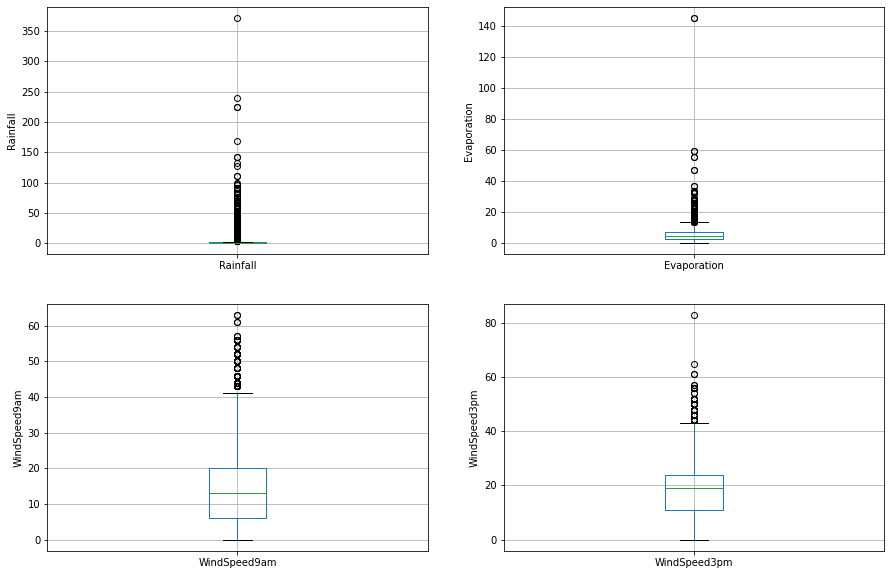

In [46]:
# draw boxplots to visualize outliers

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')


plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')


plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')


plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

Text(0, 0.5, 'RainTomorrow')

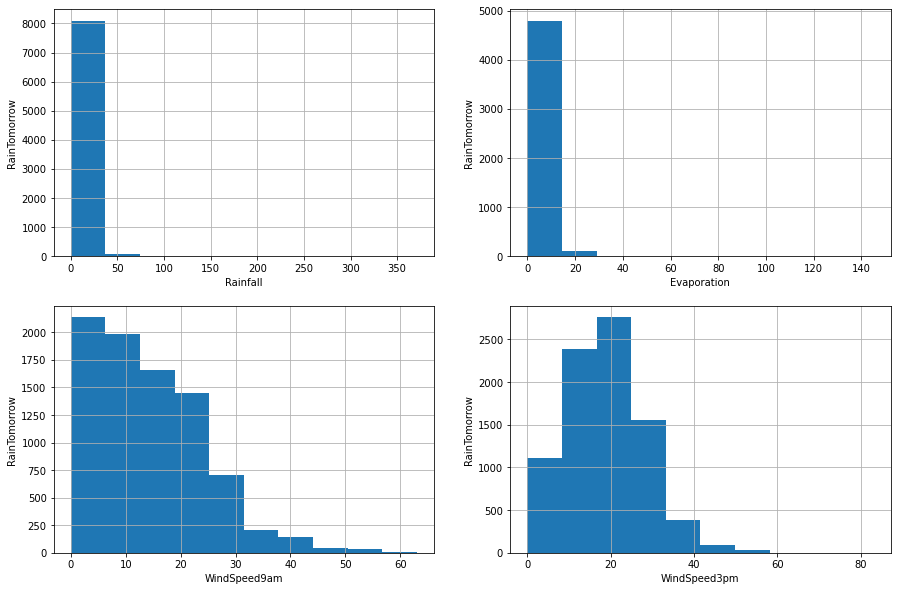

In [47]:
# plot histogram to check distribution

plt.figure(figsize=(15,10))


plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')


plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

In [48]:
# find outliers for Rainfall variable

IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Rainfall outliers are values < -3.0 or > 4.0


In [49]:
#For `Rainfall`, the minimum and maximum values are 0.0 and 371.0. So, the outliers are values > 3.2.

In [50]:
# find outliers for Evaporation variable

IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


Evaporation outliers are values < -10.600000000000001 or > 20.200000000000003


In [51]:
# find outliers for WindSpeed3pm variable

IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))


WindSpeed3pm outliers are values < -28.0 or > 63.0


In [52]:
X = df.drop(['RainTomorrow'], axis=1)

y = df['RainTomorrow']

In [53]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [54]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((6740, 24), (1685, 24))

In [55]:
# check data types in X_train

X_train.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
Year               int64
Month              int64
Day                int64
dtype: object

In [56]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [57]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

In [58]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp            57
MaxTemp            49
Rainfall          194
Evaporation      2778
Sunshine         3162
WindGustSpeed     801
WindSpeed9am       61
WindSpeed3pm       84
Humidity9am        45
Humidity3pm        83
Pressure9am      1034
Pressure3pm      1038
Cloud9am         1914
Cloud3pm         1940
Temp9am            43
Temp3pm            77
Year                0
Month               0
Day                 0
dtype: int64

In [59]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

MinTemp           18
MaxTemp           11
Rainfall          46
Evaporation      734
Sunshine         832
WindGustSpeed    190
WindSpeed9am      15
WindSpeed3pm      23
Humidity9am       14
Humidity3pm       19
Pressure9am      275
Pressure3pm      274
Cloud9am         507
Cloud3pm         515
Temp9am           13
Temp3pm           19
Year               0
Month              0
Day                0
dtype: int64

In [60]:
# print percentage of missing values in the numerical variables in training set
#null values are very less in percentage so we can neglect it 

for col in numerical:
    if X_train[col].isnull().mean()>0:
        print(col, round(X_train[col].isnull().mean(),4))

MinTemp 0.0085
MaxTemp 0.0073
Rainfall 0.0288
Evaporation 0.4122
Sunshine 0.4691
WindGustSpeed 0.1188
WindSpeed9am 0.0091
WindSpeed3pm 0.0125
Humidity9am 0.0067
Humidity3pm 0.0123
Pressure9am 0.1534
Pressure3pm 0.154
Cloud9am 0.284
Cloud3pm 0.2878
Temp9am 0.0064
Temp3pm 0.0114


In [61]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.000000
WindGustDir    0.118843
WindDir9am     0.100148
WindDir3pm     0.036499
RainToday      0.028783
dtype: float64

In [62]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

WindGustDir 0.11884272997032641
WindDir9am 0.10014836795252226
WindDir3pm 0.03649851632047478
RainToday 0.028783382789317507


In [63]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [64]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [65]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [66]:
# check missing values in X_train

X_train.isnull().sum()

Location            0
MinTemp            57
MaxTemp            49
Rainfall          194
Evaporation      2778
Sunshine         3162
WindGustDir         0
WindGustSpeed     801
WindDir9am          0
WindDir3pm          0
WindSpeed9am       61
WindSpeed3pm       84
Humidity9am        45
Humidity3pm        83
Pressure9am      1034
Pressure3pm      1038
Cloud9am         1914
Cloud3pm         1940
Temp9am            43
Temp3pm            77
RainToday           0
Year                0
Month               0
Day                 0
dtype: int64

In [67]:
# check missing values in X_test

X_test.isnull().sum()

Location           0
MinTemp           18
MaxTemp           11
Rainfall          46
Evaporation      734
Sunshine         832
WindGustDir        0
WindGustSpeed    190
WindDir9am         0
WindDir3pm         0
WindSpeed9am      15
WindSpeed3pm      23
Humidity9am       14
Humidity3pm       19
Pressure9am      275
Pressure3pm      274
Cloud9am         507
Cloud3pm         515
Temp9am           13
Temp3pm           19
RainToday          0
Year               0
Month              0
Day                0
dtype: int64

In [68]:
# impute missing values in X_train and X_test with respective column median in X_train

for df1 in [X_train, X_test]:
    for col in numerical:
        col_median=X_train[col].median()
        df1[col].fillna(col_median, inplace=True)           
      

In [69]:
# check again missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [70]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
Year             0
Month            0
Day              0
dtype: int64

In [71]:
# print percentage of missing values in the categorical variables in training set

X_train[categorical].isnull().mean()

Location       0.0
WindGustDir    0.0
WindDir9am     0.0
WindDir3pm     0.0
RainToday      0.0
dtype: float64

In [72]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

In [73]:
# impute missing categorical variables with most frequent value

for df2 in [X_train, X_test]:
    df2['WindGustDir'].fillna(X_train['WindGustDir'].mode()[0], inplace=True)
    df2['WindDir9am'].fillna(X_train['WindDir9am'].mode()[0], inplace=True)
    df2['WindDir3pm'].fillna(X_train['WindDir3pm'].mode()[0], inplace=True)
    df2['RainToday'].fillna(X_train['RainToday'].mode()[0], inplace=True)

In [74]:
# check missing values in categorical variables in X_train

X_train[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [75]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

Location       0
WindGustDir    0
WindDir9am     0
WindDir3pm     0
RainToday      0
dtype: int64

In [76]:
# check missing values in X_test

X_test.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
Year             0
Month            0
Day              0
dtype: int64

In [77]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [78]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [79]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [80]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [81]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [82]:
X_train[numerical].describe()
#We can now see that the outliers in `Rainfall`, `Evaporation`, `WindSpeed9am` and `WindSpeed3pm` columns are capped.

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000
mean,13.228991,23.903858,0.706484,5.013694,8.164184,40.055638,13.910831,18.574777,67.661869,51.159050,1017.637537,1015.248709,4.666914,4.642136,17.814436,22.480712,2012.095549,6.470475,15.812611
std,5.377081,6.113027,1.225775,2.823192,2.865925,13.697234,10.151073,9.692094,16.735836,18.350188,6.300264,6.243750,2.438416,2.315033,5.608927,5.949288,2.471156,3.453314,8.821155
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,992.900000,990.700000,0.000000,0.000000,1.900000,7.300000,2008.000000,1.000000,1.000000
25%,9.300000,19.400000,0.000000,4.000000,8.400000,31.000000,6.000000,11.000000,56.000000,39.000000,1013.900000,1011.300000,3.000000,3.000000,13.800000,18.100000,2010.000000,3.000000,8.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,1017.700000,1015.400000,5.000000,5.000000,17.800000,21.900000,2011.000000,6.000000,16.000000
75%,17.400000,28.000000,0.800000,5.200000,9.000000,48.000000,20.000000,24.000000,80.000000,63.000000,1021.300000,1018.900000,7.000000,7.000000,22.000000,26.300000,2014.000000,9.000000,23.000000
max,28.500000,45.500000,3.200000,21.800000,13.900000,107.000000,55.000000,57.000000,100.000000,99.000000,1039.000000,1036.000000,8.000000,8.000000,39.400000,44.100000,2017.000000,12.000000,31.000000


In [83]:
# encode RainToday variable

import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [84]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
2038,Newcastle,17.5,22.7,0.0,4.6,8.7,N,39.0,SE,SE,...,1015.4,8.0,7.0,20.0,21.5,0,1,2014,11,11
3440,Wollongong,15.7,21.5,0.4,4.6,8.7,NE,39.0,E,ENE,...,1018.9,8.0,7.0,18.1,19.5,0,1,2008,12,4
143,Albury,6.0,22.9,0.0,4.6,8.7,NE,33.0,N,NE,...,1015.7,5.0,5.0,12.9,22.6,0,1,2009,4,23
5467,Melbourne,17.5,24.1,0.0,7.0,11.7,SSE,33.0,SSE,SSE,...,1022.0,7.0,0.0,19.9,23.1,0,1,2010,2,18
8050,PerthAirport,18.1,32.4,0.0,6.6,11.0,SW,37.0,NE,SW,...,1017.9,0.0,1.0,24.5,31.6,0,1,2014,3,19


In [85]:
#We can see that two additional variables `RainToday_0` and `RainToday_1` are created from `RainToday` variable.

#Now, I will create the `X_train` training set.

In [86]:
X_train = pd.concat([X_train[numerical], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location), 
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [87]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
2038,17.5,22.7,0.0,4.6,8.7,39.0,4.0,9.0,64.0,58.0,...,0,0,0,1,0,0,0,0,0,0
3440,15.7,21.5,0.4,4.6,8.7,39.0,20.0,22.0,67.0,65.0,...,0,0,0,0,0,0,0,0,0,0
143,6.0,22.9,0.0,4.6,8.7,33.0,0.0,20.0,68.0,34.0,...,0,0,0,0,0,0,0,0,0,0
5467,17.5,24.1,0.0,7.0,11.7,33.0,20.0,20.0,62.0,57.0,...,0,0,0,0,1,0,0,0,0,0
8050,18.1,32.4,0.0,6.6,11.0,37.0,13.0,26.0,51.0,27.0,...,0,0,0,0,0,0,1,0,0,0


In [88]:
X_test = pd.concat([X_test[numerical], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location), 
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [89]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
1220,20.8,30.5,0.0,6.2,8.3,43.0,4.0,30.0,60.0,68.0,...,0,0,0,0,0,0,0,0,0,0
532,4.5,17.0,0.0,4.6,8.7,48.0,7.0,7.0,92.0,50.0,...,0,0,0,0,1,0,0,0,0,0
5998,8.9,21.7,0.0,2.4,10.3,54.0,15.0,31.0,78.0,34.0,...,0,0,0,0,0,0,0,0,0,0
7707,17.5,36.1,0.0,5.0,7.3,30.0,6.0,11.0,48.0,16.0,...,0,0,0,0,0,0,0,1,0,0
509,15.4,19.8,3.2,4.6,8.7,46.0,11.0,28.0,95.0,86.0,...,1,0,0,0,0,0,0,0,0,0


In [90]:
#We now have training and testing set ready for model building. Before that, we should map all the feature variables onto the same scale. It is called `feature scaling`. I will do it as follows.

In [91]:
#feature scaling
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
count,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,...,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000,6740.000000
mean,13.228991,23.903858,0.706484,5.013694,8.164184,40.055638,13.910831,18.574777,67.661869,51.159050,...,0.036053,0.056083,0.089466,0.133086,0.076558,0.041840,0.059496,0.056231,0.057270,0.066914
std,5.377081,6.113027,1.225775,2.823192,2.865925,13.697234,10.151073,9.692094,16.735836,18.350188,...,0.186437,0.230099,0.285436,0.339693,0.265908,0.200238,0.236567,0.230385,0.232375,0.249891
min,-2.000000,8.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,10.000000,6.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.300000,19.400000,0.000000,4.000000,8.400000,31.000000,6.000000,11.000000,56.000000,39.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,13.300000,23.300000,0.000000,4.600000,8.700000,39.000000,13.000000,19.000000,68.000000,51.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,17.400000,28.000000,0.800000,5.200000,9.000000,48.000000,20.000000,24.000000,80.000000,63.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28.500000,45.500000,3.200000,21.800000,13.900000,107.000000,55.000000,57.000000,100.000000,99.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [92]:
cols = X_train.columns

In [93]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [94]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [95]:
x_test = pd.DataFrame(X_test, columns=[cols])

In [96]:
#now x_test,x_train are ready

In [97]:
y_train.fillna(y_train.mode()[0], inplace=True)
y_test.fillna(y_train.mode()[0], inplace=True)



In [501]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression
# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)
# fit the model
logreg.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [685]:
from sklearn.metrics import accuracy_score
y_pred=logreg.predict(X_test)
score=accuracy_score(y_test,y_pred)
score

0.8421364985163204

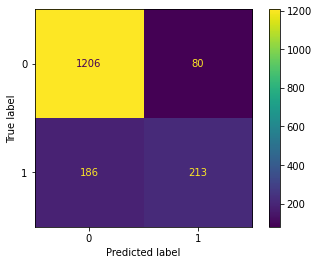

In [317]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [318]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.87      0.94      0.90      1286
         Yes       0.73      0.53      0.62       399

    accuracy                           0.84      1685
   macro avg       0.80      0.74      0.76      1685
weighted avg       0.83      0.84      0.83      1685



In [319]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
grid_parameter={
    "criterion":["gini","entropy"],
    "max_depth":range(10,15),
    "min_samples_leaf":range(2,10),
    "min_samples_split":range(3,10),
    "max_leaf_nodes":range(2,4)
}

In [321]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
grid_search=GridSearchCV(estimator=clf,param_grid=grid_parameter,cv=10,n_jobs=-1)
grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(3, 10)})

In [323]:
best_paramter=grid_search.best_params_
print(best_paramter)

{'criterion': 'entropy', 'max_depth': 10, 'max_leaf_nodes': 3, 'min_samples_leaf': 2, 'min_samples_split': 3}


In [324]:
clf=DecisionTreeClassifier(criterion= 'entropy', max_depth= 10, max_leaf_nodes= 3, min_samples_leaf= 2, min_samples_split= 3)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.799406528189911

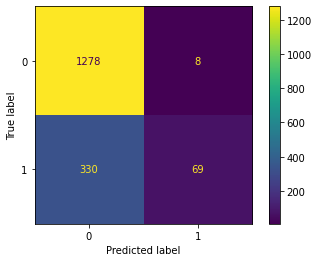

In [325]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [326]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.79      0.99      0.88      1286
         Yes       0.90      0.17      0.29       399

    accuracy                           0.80      1685
   macro avg       0.85      0.58      0.59      1685
weighted avg       0.82      0.80      0.74      1685



In [327]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
svc_model=SVC()
params = {'C': [0.001, 0.01, 0.1, 1, 10],'gamma':[0.001, 0.01, 0.1, 1]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

print(svcClf.best_params_)
print(svcClf.best_score_)

{'C': 10, 'gamma': 0.1}
0.860385756676558


In [328]:
svc_model=SVC()
params = {'C':[10] , 'gamma': [0.1]}
svcClf = GridSearchCV(svc_model, param_grid = params, scoring = 'accuracy', cv = 10)

svcClf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': [10], 'gamma': [0.1]},
             scoring='accuracy')

In [329]:
y_pred=svcClf.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8682492581602373

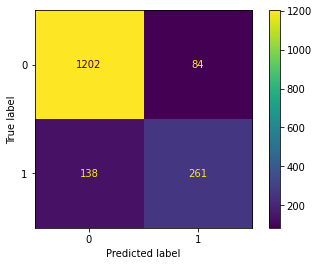

In [330]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [331]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.90      0.93      0.92      1286
         Yes       0.76      0.65      0.70       399

    accuracy                           0.87      1685
   macro avg       0.83      0.79      0.81      1685
weighted avg       0.86      0.87      0.86      1685



In [332]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]
#
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [333]:
from sklearn.ensemble import RandomForestClassifier

In [334]:
rf=RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 10, verbose=2, random_state=42, n_jobs = -1)
rf.fit(x_train, y_train)

RandomForestClassifier()

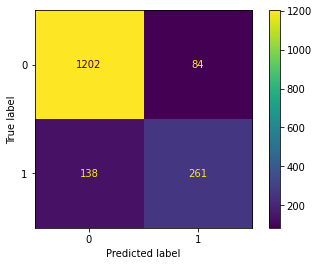

              precision    recall  f1-score   support

          No       0.90      0.93      0.92      1286
         Yes       0.76      0.65      0.70       399

    accuracy                           0.87      1685
   macro avg       0.83      0.79      0.81      1685
weighted avg       0.86      0.87      0.86      1685



In [335]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()
print(metrics.classification_report(y_test,y_pred))

In [336]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(x_train,y_train)
y_pred=kn.predict(x_test)
score=accuracy_score(y_test,y_pred)
score

0.8183976261127597

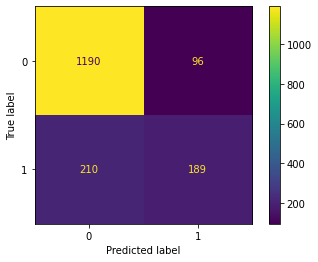

In [337]:
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
display=metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix)
display.plot()
plt.show()

In [338]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          No       0.85      0.93      0.89      1286
         Yes       0.66      0.47      0.55       399

    accuracy                           0.82      1685
   macro avg       0.76      0.70      0.72      1685
weighted avg       0.81      0.82      0.81      1685



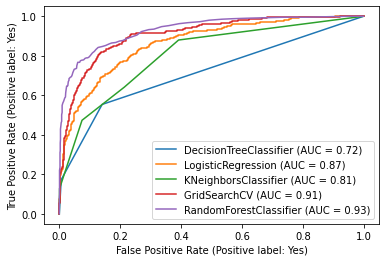

In [340]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score,plot_roc_curve
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(logreg,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

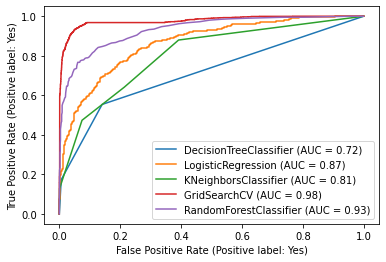

In [341]:
disp=plot_roc_curve(clf,x_test,y_test)
plot_roc_curve(logreg,x_test,y_test,ax=disp.ax_)
plot_roc_curve(kn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(svcClf,x_train,y_train,ax=disp.ax_)
plot_roc_curve(rf,x_test,y_test,ax=disp.ax_)

In [342]:
#randomforest classifier gives better result
import pickle
filename="Survive"
pickle.dump(rf,open(filename,"wb"))

In [810]:
#Rainfall prediction

In [99]:
X_train.isnull().sum()

MinTemp        0
MaxTemp        0
Rainfall       0
Evaporation    0
Sunshine       0
              ..
SSW            0
SW             0
W              0
WNW            0
WSW            0
Length: 81, dtype: int64

In [100]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6740 entries, 0 to 6739
Data columns (total 81 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   (MinTemp,)        6740 non-null   float64
 1   (MaxTemp,)        6740 non-null   float64
 2   (Rainfall,)       6740 non-null   float64
 3   (Evaporation,)    6740 non-null   float64
 4   (Sunshine,)       6740 non-null   float64
 5   (WindGustSpeed,)  6740 non-null   float64
 6   (WindSpeed9am,)   6740 non-null   float64
 7   (WindSpeed3pm,)   6740 non-null   float64
 8   (Humidity9am,)    6740 non-null   float64
 9   (Humidity3pm,)    6740 non-null   float64
 10  (Pressure9am,)    6740 non-null   float64
 11  (Pressure3pm,)    6740 non-null   float64
 12  (Cloud9am,)       6740 non-null   float64
 13  (Cloud3pm,)       6740 non-null   float64
 14  (Temp9am,)        6740 non-null   float64
 15  (Temp3pm,)        6740 non-null   float64
 16  (Year,)           6740 non-null   float64


In [101]:
#rainfall prediction
X_copy=X_train
X_train=X_train.drop(columns="Rainfall")
y_train=X_copy["Rainfall"]
X_copy=X_test
X_test=X_test.drop(columns="Rainfall")
y_test=X_copy["Rainfall"]

In [108]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [103]:
LR=LinearRegression()
LR=LR.fit(X_train,y_train)
y_Ptrain=LR.predict(X_train)
y_Ptest=LR.predict(X_test)
score1=r2_score(y_train,y_Ptrain)
score2=mean_absolute_error(y_train,y_Ptrain)
score3=mean_squared_error(y_train,y_Ptrain)
print(score1)
print(score2)
print(score3)

0.9245225066936019
0.06171908336152662
0.011073231485822824


In [509]:
from sklearn.model_selection import cross_val_score,GridSearchCV
trainscore=r2_score(y_Ptrain,y_train)
testscore=r2_score(y_test,y_Ptest)
for i in range(2,10):
    crossval=cross_val_score(LR,X_train,y_train,cv=i)
    cvmean=crossval.mean()
    print("At cv= {}, cross mean is {},and testscore={}".format(i,cvmean,testscore))

At cv= 2, cross mean is 0.9207747653957332,and testscore=0.9210380660703454
At cv= 3, cross mean is 0.9218119670306738,and testscore=0.9210380660703454
At cv= 4, cross mean is 0.9218439552762785,and testscore=0.9210380660703454
At cv= 5, cross mean is 0.92193559168575,and testscore=0.9210380660703454
At cv= 6, cross mean is 0.9221796139570869,and testscore=0.9210380660703454
At cv= 7, cross mean is 0.922364206779843,and testscore=0.9210380660703454
At cv= 8, cross mean is 0.9222904222493605,and testscore=0.9210380660703454
At cv= 9, cross mean is 0.9221404484675629,and testscore=0.9210380660703454


In [ ]:
#at cv=5 both cross and test score is approximately so will consider the at cv=5

In [511]:
from sklearn.linear_model import Lasso
ls=Lasso()
params = {'alpha': [0.001, 0.01, 0.1, 1, 10],'random_state':list(range(1,10))}
lsm = GridSearchCV(ls, params)

lsm.fit(X_train, y_train)

print(lsm.best_params_)
print(lsm.best_score_)

{'alpha': 0.001, 'random_state': 1}
0.9214366596366261


In [514]:
ls=Lasso(alpha=0.001,random_state=1)
lsm.fit(X_train,y_train)
y_pred=lsm.predict(X_test)
score=r2_score(y_test,y_pred)
score1=mean_absolute_error(y_test,y_pred)
score2=mean_squared_error(y_test,y_pred)
print(score)
print(score1)
print(score2)

0.9201437419304594
0.06325621718674708
0.012231948976231


In [516]:
crossvalue=cross_val_score(lsm,X_train,y_train,cv=9)
cvmean=crossvalue.mean()
cvmean

0.9214936811670389

In [111]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score,GridSearchCV
rm=RandomForestRegressor()
import warnings
warnings.filterwarnings("ignore")
para={'criterion':['mse','mae'],'max_features':["auto","sqrt","log2"]}
rmg=GridSearchCV(rm,para)
rmg.fit(X_train,y_train)
rmg.best_params_

{'criterion': 'mse', 'max_features': 'auto'}

In [ ]:
rm=RandomForestRegressor(criterion="mse",max_features="auto")
rmg.fit(X_train,y_train)
y_pred=rmg.predict(X_test)
score=r2_score(y_test,y_pred)
score1=mean_absolute_error(y_test,y_pred) 
score2=mean_squared_error(y_test,y_pred)

In [105]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(X_train, y_train)
pred=dt.predict(X_test)
score=r2_score(y_test,pred)
score1=mean_absolute_error(y_test,pred)
score2=mean_squared_error(y_test,pred)

In [106]:
print(score1)
print(score2)
print(score)  

0.04571587537091988
0.015467938612759644
0.8990175890968318


In [ ]:
crossvalue=cross_val_score(rmg,X_train,y_train,cv=9)
crossmean=crossvalue.mean()
print(crossmean)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
kn=KNeighborsRegressor()
kn.fit(X_train, y_train)
pred=kn.predict(x_test)
score=r2_score(y_test,pred)

In [ ]:
crossval=cross_val_score(kn,X_train,y_train,cv=2)
cvmean=crossval.mean()
cvmean

In [ ]:
#Among 5 linear  regressor is the best regressor.
#The random forest taking more time to execute. i waited for more then 4 hours. still not completed 
import pickle
file_name="Global power"
pickle.dump(lr,open(file_name,"wb"))